# Проверка гипотез в интернет-магазине

**ОПИСАНИЕ ПРОЕКТА**

***Необходимо приоритизировать гипотезы, запустить А/B тест и проанализировать результаты по увеличению выручки в интернет-магазине.***

**ОПИСАНИЕ ДАННЫХ**

В файле ***/datasets/hypothesis.csv*** 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами:

<br>***Hypothesis*** — краткое описание гипотезы;
<br>***Reach*** — охват пользователей по 10-балльной шкале;
<br>***Impact*** — влияние на пользователей по 10-балльной шкале;
<br>***Confidence*** — уверенность в гипотезе по 10-балльной шкале;
<br>***Effort*** — затраты ресурсов на проверку гипотезы по 10-балльной шкале.
<br>Чем больше значение Efforts, тем дороже проверка гипотезы.

Результаты A/B теста

Файл ***/datasets/orders.csv***:

<br>***transactionId*** — идентификатор заказа;
<br>***visitorId*** — идентификатор пользователя, совершившего заказ;
<br>***date*** — дата, когда был совершён заказ;
<br>***revenue*** — выручка заказа;
<br>***group*** — группа A/B-теста, в которую попал заказ.

Файл ***/datasets/visitors.csv***:

<br>***date*** — дата;
<br>***group*** — группа A/B-теста;
<br>***visitors*** — количество пользователей в указанную дату в указанной группе A/B-теста

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Оценка-и-подготовка-данных" data-toc-modified-id="Оценка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Оценка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Оценка-данных" data-toc-modified-id="Оценка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Оценка данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Проверка-диапазонов-дат,-изменение-типов-данных" data-toc-modified-id="Проверка-диапазонов-дат,-изменение-типов-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка диапазонов дат, изменение типов данных</a></span></li><li><span><a href="#Очистка-данных-от-пользователей-вошедших-одновременно-в-обе-группы" data-toc-modified-id="Очистка-данных-от-пользователей-вошедших-одновременно-в-обе-группы-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Очистка данных от пользователей вошедших одновременно в обе группы</a></span></li></ul></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Приоритизация гипотез</a></span><ul class="toc-item"><li><span><a href="#Фреймворк-ICE" data-toc-modified-id="Фреймворк-ICE-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Фреймворк ICE</a></span></li><li><span><a href="#Фреймворк-RICE" data-toc-modified-id="Фреймворк-RICE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Фреймворк RICE</a></span></li></ul></li><li><span><a href="#Анализ-A/B-Теста" data-toc-modified-id="Анализ-A/B-Теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ A/B Теста</a></span><ul class="toc-item"><li><span><a href="#График-кумулятивной-выручки-по-группам" data-toc-modified-id="График-кумулятивной-выручки-по-группам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>График кумулятивной выручки по группам</a></span></li><li><span><a href="#График-кумулятивного-среднего-чека-по-группам" data-toc-modified-id="График-кумулятивного-среднего-чека-по-группам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>График кумулятивного среднего чека по группам</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивного-среднего-чека" data-toc-modified-id="График-относительного-изменения-кумулятивного-среднего-чека-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>График относительного изменения кумулятивного среднего чека</a></span></li><li><span><a href="#График-кумулятивной-конверсии-по-группам" data-toc-modified-id="График-кумулятивной-конверсии-по-группам-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>График кумулятивной конверсии по группам</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивной-конверсии-группы-B-к-группе-A" data-toc-modified-id="График-относительного-изменения-кумулятивной-конверсии-группы-B-к-группе-A-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>График относительного изменения кумулятивной конверсии группы B к группе A</a></span></li><li><span><a href="#График-количества-заказов-по-пользователям" data-toc-modified-id="График-количества-заказов-по-пользователям-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>График количества заказов по пользователям</a></span></li><li><span><a href="#95-й-и-99-й-перцентили-количества-заказов-на-пользователя" data-toc-modified-id="95-й-и-99-й-перцентили-количества-заказов-на-пользователя-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>95-й и 99-й перцентили количества заказов на пользователя</a></span></li><li><span><a href="#График-стоимостей-заказов" data-toc-modified-id="График-стоимостей-заказов-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>График стоимостей заказов</a></span></li><li><span><a href="#95-й-и-99-й-перцентили-стоимости-заказов" data-toc-modified-id="95-й-и-99-й-перцентили-стоимости-заказов-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>95-й и 99-й перцентили стоимости заказов</a></span></li><li><span><a href="#Cтатистическая-значимость-различий-в-конверсии-между-группами-по-«сырым»-данным" data-toc-modified-id="Cтатистическая-значимость-различий-в-конверсии-между-группами-по-«сырым»-данным-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Cтатистическая значимость различий в конверсии между группами по «сырым» данным</a></span></li><li><span><a href="#Cтатистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным" data-toc-modified-id="Cтатистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным</a></span></li><li><span><a href="#Cтатистическая-значимость-различий-в-конверсии-между-группами-по-«очищенным»-данным" data-toc-modified-id="Cтатистическая-значимость-различий-в-конверсии-между-группами-по-«очищенным»-данным-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>Cтатистическая значимость различий в конверсии между группами по «очищенным» данным</a></span></li><li><span><a href="#Cтатистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным" data-toc-modified-id="Cтатистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным-3.13"><span class="toc-item-num">3.13&nbsp;&nbsp;</span>Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Оценка и подготовка данных

### Оценка данных

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as st
from scipy import stats
from collections import defaultdict

In [2]:
pd.set_option('display.max_colwidth', 255)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 100)

In [3]:
# Загрузка датасета
hyps = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [4]:
# Функция просмотра датасетов
def datalook(dataset):
    display(dataset.info())
    display(dataset.head())
    display(dataset.describe())
    display(dataset.describe(include=[object]))
    print('Количество полных дубликатов:', dataset.duplicated().sum())
    return

In [5]:
# Оценка таблицы с гипотезами
datalook(hyps)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


,Hypothesis
count,9
unique,9
top,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
freq,1


Количество полных дубликатов: 0


In [6]:
# Оценка таблицы с заказми
datalook(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transactionId,visitorId,revenue
count,1197.00,1197.00,1197.00
mean,2155621385.53,2165960143.10,8348.01
std,1229084904.76,1236014192.15,39191.13
min,1062393.00,5114589.00,50.00
25%,1166775572.00,1111826046.00,1220.00
50%,2145193898.00,2217984702.00,2978.00
75%,3237740112.00,3177606451.00,8290.00
max,4293855558.00,4283872382.00,1294500.00


,date,group
count,1197,1197
unique,31,2
top,2019-08-05,B
freq,48,640


Количество полных дубликатов: 0


**Пропусков нет, в столбце date нужно заменить тип даты на datetime, проверить диапазон дат**

In [7]:
datalook(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


,date,group
count,62,62
unique,31,2
top,2019-08-30,A
freq,2,31


Количество полных дубликатов: 0


**Пропусков нет, в столбце date нужно заменить тип даты на datetime, проверить диапазон дат**

### Подготовка данных

### Проверка диапазонов дат, изменение типов данных

In [8]:
# Просмотр диапазона дат
print('Начальная дата',orders['date'].min())
print('Конечная дата',orders['date'].max())

Начальная дата 2019-08-01
Конечная дата 2019-08-31


In [9]:
# Замена типа на тип даты
orders['date'] = orders['date'].astype('datetime64[D]')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))

In [10]:
# Просмотр диапазона дат
print('Начальная дата',visitors['date'].min())
print('Конечная дата',visitors['date'].max())

Начальная дата 2019-08-01
Конечная дата 2019-08-31


In [11]:
# Замена типа на тип даты
visitors['date'] = visitors['date'].astype('datetime64[D]')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))

In [12]:
# Приведение к нижнему регистру столбцов в заказах
orders.columns = map(str.lower, orders.columns)

**Столбцы с датами приведены к типу datetime, диапазоны дат проверены - совпадают в обеих таблицах, с 1 по 31 августа 2019 г.**

In [13]:
# Группировка количества уникальных групп для каждого покупателя
orders['group_ncount'] = orders.groupby('visitorid')['group'].transform(pd.Series.nunique)
orders.head()

,transactionid,visitorid,date,revenue,group,group_ncount
0,3667963787,3312258926,2019-08-15,1650,B,1
1,2804400009,3642806036,2019-08-15,730,B,1
2,2961555356,4069496402,2019-08-15,400,A,2
3,3797467345,1196621759,2019-08-15,9759,B,1
4,2282983706,2322279887,2019-08-15,2308,B,1


In [14]:
# Выделение мультипокупателей из заказов по id
multi_users = orders.query('group_ncount > 1')
print('Количество покупателей попавших в обе группы',multi_users['visitorid'].nunique())
multi_users = multi_users['visitorid'].unique().tolist()

Количество покупателей попавших в обе группы 58


**58 покупателей есть в группе А и группе B одновременно, такие покупатели искажают данные теста. Необходимо очистить таблицу от всех таких пользователей**

### Очистка данных от пользователей вошедших одновременно в обе группы

In [15]:
# Исключение из таблицы заказов покупателей покупавших в обоих группах
orders_original = orders.copy()
orders = orders.query('visitorid not in @multi_users')
orders

,transactionid,visitorid,date,revenue,group,group_ncount
0,3667963787,3312258926,2019-08-15,1650,B,1
1,2804400009,3642806036,2019-08-15,730,B,1
3,3797467345,1196621759,2019-08-15,9759,B,1
4,2282983706,2322279887,2019-08-15,2308,B,1
5,182168103,935554773,2019-08-15,2210,B,1
...,...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B,1
1192,2662137336,3733762160,2019-08-14,6490,B,1
1193,2203539145,370388673,2019-08-14,3190,A,1
1194,1807773912,573423106,2019-08-14,10550,A,1


**Из таблицы заказов удалены строки покупателей покупавших в обоих тестовых группах, кол-во строк совпадает с исходным датафреймом за минусом мультипокупателей обоих групп**

In [16]:
# Фильтр заказов по мультиюзерам
all_orders_by_multiusers = orders_original.query('group_ncount > 1')
# Группировка мультигрупповых покупателей
multi_users_grouped = all_orders_by_multiusers.groupby(
    ['visitorid', 'group', 'date']).agg({'transactionid': 'nunique'}).reset_index()
# Добавление технического столбца со значением -1 для строк с группой и датой мультипокупателей
multi_users_grouped['count'] = -1
multi_users_grouped = multi_users_grouped[['group', 'date', 'count']]
multi_users_grouped.head()

,group,date,count
0,A,2019-08-07,-1
1,B,2019-08-01,-1
2,A,2019-08-12,-1
3,A,2019-08-15,-1
4,A,2019-08-22,-1


In [17]:
# Объединение таблицы визитов с таблицей мультипокупателей отмаркированных -1, по дате и группе
# значение 0 - для обычных визитровов одной из групп
visitors_original = visitors.copy()
visitors = visitors.merge(multi_users_grouped, on=['date', 'group'], how='left').fillna(0)
visitors.head()

,date,group,visitors,count
0,2019-08-01,A,719,-1.00
1,2019-08-02,A,619,-1.00
2,2019-08-03,A,507,0.00
3,2019-08-04,A,717,-1.00
4,2019-08-04,A,717,-1.00


In [18]:
# Добавление столбца с визитерами где отминусованы мультивизитеры
visitors['non_multi_visitors'] = visitors['visitors'] + visitors['count']
visitors['non_multi_visitors'] = visitors['non_multi_visitors'].astype(int)
visitors.head(3)

,date,group,visitors,count,non_multi_visitors
0,2019-08-01,A,719,-1.00,718
1,2019-08-02,A,619,-1.00,618
2,2019-08-03,A,507,0.00,507


In [19]:
# Приведенеие отфильтрованной таблицы с визитами в изначальный вид
visitors = visitors.drop(['visitors', 'count'], axis=1)
visitors.columns = ['date', 'group', 'visitors']
visitors.head()

,date,group,visitors
0,2019-08-01,A,718
1,2019-08-02,A,618
2,2019-08-03,A,507
3,2019-08-04,A,716
4,2019-08-04,A,716


**Из количества посетителей по каждому дню удалены посетители  покупавшие в обоих группах в соответствии с датами заказов**

**В результате предобработки:**

<br>**проверен диапазон дат таблиц заказов и посетителей, диапазон - с 1 по 31 августа 2019 г
<br>изменен тип данных столбца date на тип данных дата
<br>таблица заказов проверена на наличие покупателей оказавшихся в обоих группах
<br>таблицы с заказами и визитами очищены от покупателей оказавшихся в обоих группах**

## Приоритизация гипотез

### Фреймворк ICE 

In [20]:
# Просмотр файла с гипотезами
hyps.columns = map(str.lower, hyps.columns)
hyps.style.background_gradient(cmap="coolwarm")

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [21]:
# Расчет ICE
hyps['ice'] = hyps['impact'] * hyps['confidence'] / hyps['efforts']

In [22]:
# Итоговая таблица
hyps = hyps.round().sort_values(by='ice', ascending=False)
hyps.style.background_gradient(cmap="coolwarm", subset=['ice'])

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1


**Топ 3 по ICE:**
<br>*акция по скидке в день рождения,
<br>добавление двух каналов привлечения трафика,
<br>добавление формы подписки на все основыне страницы*.

### Фреймворк RICE 

In [23]:
# Расчет RICE
hyps['rice'] = hyps['reach']*hyps['impact']*hyps['confidence'] / hyps['efforts']
hyps = hyps.round().sort_values(by='rice', ascending=False)
hyps.style.background_gradient(
    cmap="coolwarm", subset=['ice']).background_gradient(
    cmap="coolwarm", subset=['rice']).background_gradient(
    cmap="binary", subset=['reach']).background_gradient(
    cmap="binary", subset=['impact']).background_gradient(
    cmap="binary", subset=['confidence']).background_gradient(
    cmap="binary", subset=['efforts'])

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16,16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3


**Топ  3 по RICE:**
<br>*добавление формы подписки на все основные страницы,
<br>блоки рекомендаций на сайт,
<br>добавление каналов привлечения трафика.*

**Вывод по приоритизации:**

<br>При добавленит параметра reach, который характеризует охват пользователей в RICE, топ приоритизации изменился. Гипотезы с небольшим оцененным охватом пользователей - акция со скидкой в день рождения, уступила место добавлению блока рекомендаций, с высокой долей охвата.
<br> Разница по RICE между добавлением новых каналов трафика и показаом банера с акциями на главной странице практически отсутствует. Первая из этих двух гипотез более сильно повлияет на пользователей, но охватит их меньше и более дорога в затратах, вторая - охватит больше пользователей но с меньшим влиянием, к тому же потребует небольших расходов. К тому же добавление баннера с акциями на главной странице по цели - увеличение конверсии имеет более рейтинговую гипотезу с той же целью - добавление блоков рекомендаций на сайт. 

## Анализ A/B Теста

### График кумулятивной выручки по группам

In [24]:
# Массив уникальных дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()
dates_groups.sample(3)

,date,group
540,2019-08-20,A
362,2019-08-06,A
753,2019-08-21,B


In [25]:
# Агрегация заказов, вычисление максимальной даты
orders_aggregated = dates_groups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
{'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}),\
axis=1).sort_values(by=['date','group'])
orders_aggregated.sample()

,date,group,transactionid,visitorid,revenue
229,2019-08-18,A,278,264,1876741


In [26]:
visitors.sample(3)

,date,group,visitors
153,2019-08-26,B,675
113,2019-08-09,B,609
26,2019-08-12,A,594


In [27]:
# Аггрегация визиторов
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitors_aggregated.sample()

,date,group,visitors
533,2019-08-29,B,50322


In [28]:
# Объединение аггрегированных данных
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
# Перименования столбцов
# -  кол-во покупок 
# - кол-во покупателей 
# - выручка 
# - кол-во посетителей
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.sample()

,date,group,orders,buyers,revenue,visitors
44,2019-08-23,A,359,341,2424010,41392


In [29]:
# Таблица с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
# Таблица с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

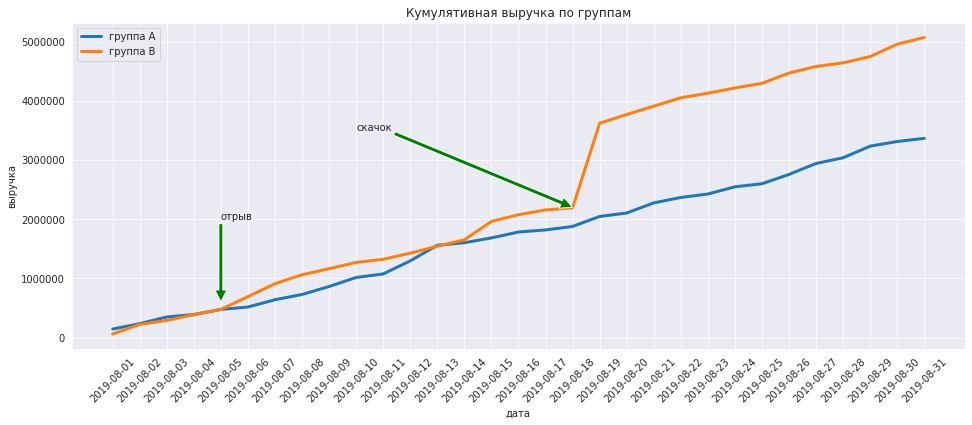

In [30]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(
    x='date', y='revenue', data=cumulative_revenue_a, legend='brief', label=str(
    'группа А'), linewidth=3)
sns.lineplot(
    x='date', y='revenue', data=cumulative_revenue_b, legend='brief', label=str(
    'группа B'), linewidth=3)
plt.annotate('скачок', xy=('2019-08-18', 2200000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 600000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) 
plt.title('Кумулятивная выручка по группам')
plt.xlabel('дата')
plt.ylabel('выручка')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

In [31]:
# Среднее количесвто заказов группы А
cumulative_revenue_a['orders'].mean().round()

255.0

In [32]:
# Среднее количесвто заказов группы B
cumulative_revenue_b['orders'].mean().round()

292.0

In [33]:
# Количество заказов с 17 по 20 августа
cumulative_revenue_a.query('date in ["2019-08-16", "2019-08-17", "2019-08-18", "2019-08-19", "2019-08-20"]')

,date,revenue,orders
30,2019-08-16,1782420,259
32,2019-08-17,1817160,265
34,2019-08-18,1876741,278
36,2019-08-19,2044934,299
38,2019-08-20,2103613,309


Выручка по группе А стала превышать на небольшую величину выручку группы B с 5 августа. 19 августа выручка группы А резко выросла, колицество заказов за день увеличилось в 2 раза чем обычно. Далее выручка не вернулась на уровни роста до скачка, как это вероятно произошло бы в случае аномальных продаж в один конкретный день.

### График кумулятивного среднего чека по группам

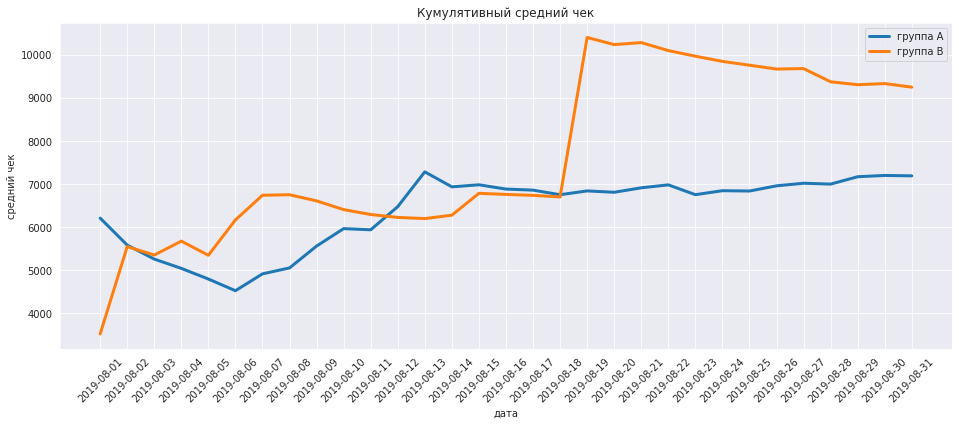

In [34]:
# График кумулятивной выручки
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(
    x='date', y=cumulative_revenue_a[
        'revenue']/cumulative_revenue_a['orders'], data=cumulative_revenue_a, legend='brief', label=str(
    'группа А'), linewidth=3)
sns.lineplot(
    x='date', y=cumulative_revenue_b[
        'revenue']/cumulative_revenue_b['orders'], data=cumulative_revenue_b, legend='brief', label=str(
    'группа B'), linewidth=3)
plt.title('Кумулятивный средний чек')
plt.xlabel('дата')
plt.ylabel('средний чек')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

**Средний чек группы B также демонстрирует превышение над значениями группы A, хотя в отдельные дни оказывался меньше. 19 августа также как и в выручке, есть скачек среднего чека у группы Б. Так как средний чек возрос одновременно с возросшим количеством заказов, это не просто несколько аномально высоких покупок, скорее всего произошло событие стимулирующее одновременный рост количества заказов и среднего чека в группе Б.**

### График относительного изменения кумулятивного среднего чека

In [35]:
# Объединение данных А и B
cumulative_revenue_merged = cumulative_revenue_a.merge(
    cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
cumulative_revenue_merged.sample(3)

,date,revenue_a,orders_a,revenue_b,orders_b
20,2019-08-21,2273782,329,3908406,380
16,2019-08-17,1817160,265,2155542,320
7,2019-08-08,727219,144,1059795,157


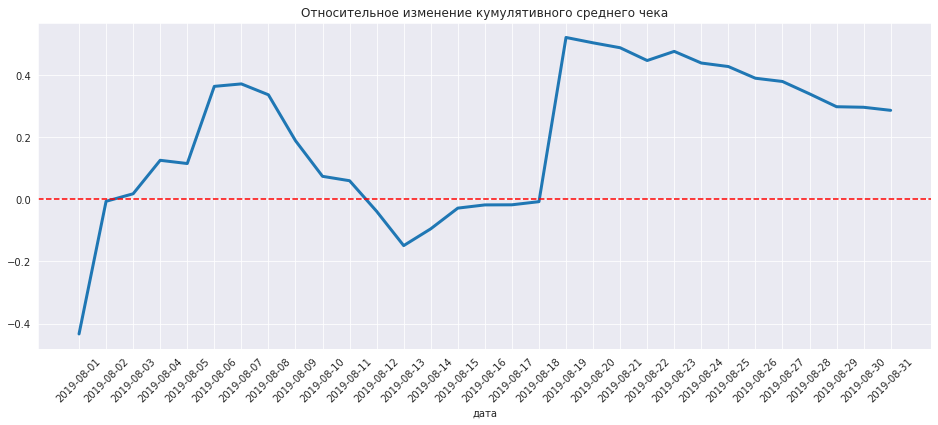

In [36]:
fig, ax = plt.subplots(figsize=(16, 6))
dif = (cumulative_revenue_merged['revenue_b'] / cumulative_revenue_merged['orders_b']) / (
    cumulative_revenue_merged['revenue_a'] / cumulative_revenue_merged['orders_a'])-1
sns.lineplot(
    x=cumulative_revenue_merged['date'], y=dif, data=cumulative_revenue_a, linewidth=3)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека')
plt.xlabel('дата')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

**Выраженные колебания присутствуют, возможно были аномалии повлиявшие на график. Наблюдается тот же подъем 19 августа, что и в выручке и среднем чеке.**

###  График кумулятивной конверсии по группам

In [37]:
# Расчет кумулятивной конверсии
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

In [38]:
# Разделение данных по группам
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

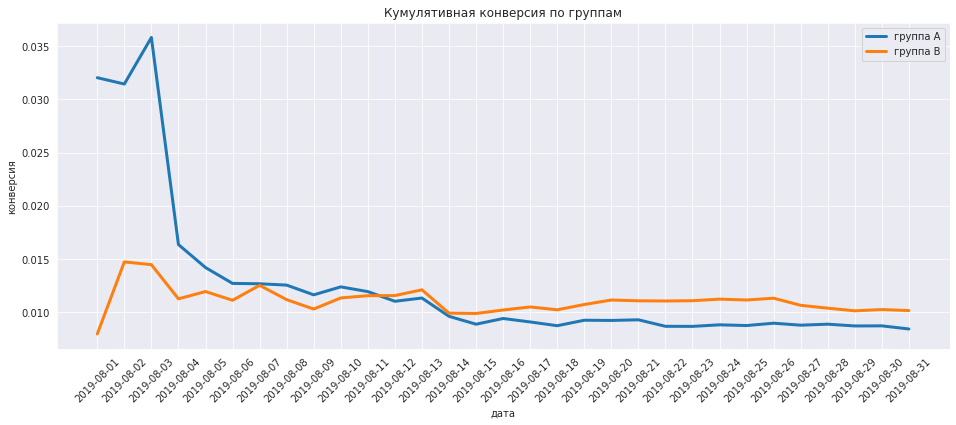

In [39]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(
    x='date', y='conversion', data=cumulative_data_a, legend='brief', label=str(
    'группа А'), linewidth=3)
sns.lineplot(
    x='date', y='conversion', data=cumulative_data_b, legend='brief', label=str(
    'группа B'), linewidth=3)
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('дата')
plt.ylabel('конверсия')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

**График группы B в начале эксперимента ниже группы А, но 11 августа стабильно выше группы А, хотя разница небольшая.**

### График относительного изменения кумулятивной конверсии группы B к группе A

In [40]:
# Объединение таблиц с конверсией групп А и B
cumulative_conversions_merged = cumulative_data_a[
    ['date','conversion']].merge(cumulative_data_b[
    ['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
cumulative_conversions_merged.sample(3)

,date,conversionA,conversionB
25,2019-08-26,0.01,0.01
23,2019-08-24,0.01,0.01
13,2019-08-14,0.01,0.01


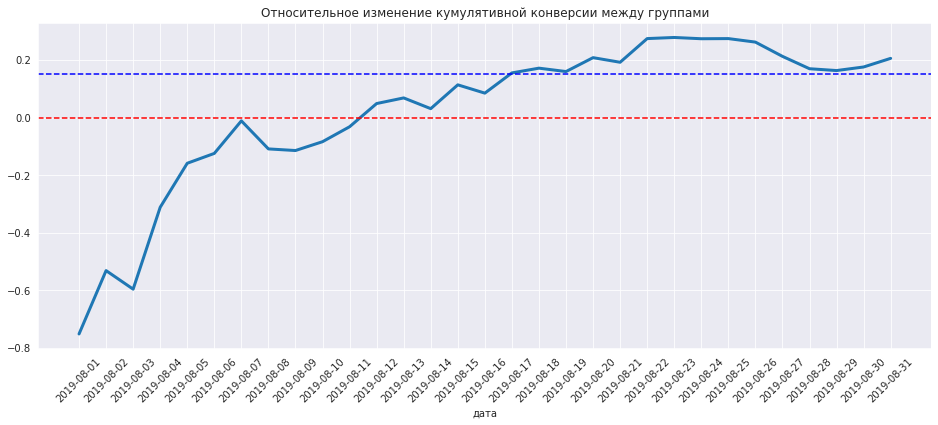

In [41]:
fig, ax = plt.subplots(figsize=(16, 6))
dif = ((cumulative_conversions_merged['conversionB'] / cumulative_conversions_merged['conversionA'])-1)
sns.lineplot(
    x=cumulative_conversions_merged['date'], y=dif, data=cumulative_conversions_merged, linewidth=3)
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.15, color='blue', linestyle='--')
plt.title('Относительное изменение кумулятивной конверсии между группами')
plt.xlabel('дата')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

**С 17 августа относительная разница между группами, после скачков первой половины месяца, составила 15% и больше не опускалась ниже этого уровня.**

### График количества заказов по пользователям

In [42]:
# Группировка количества заказов по пользователям
orders_per_user = orders.groupby(
    'visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique}).sort_values(by='transactionid', ascending = False)
orders_per_user.columns = ['visitorid','orders']
orders_per_user.sample(3)

,visitorid,orders
2,11685486,1
317,1390677121,1
275,1206072200,1


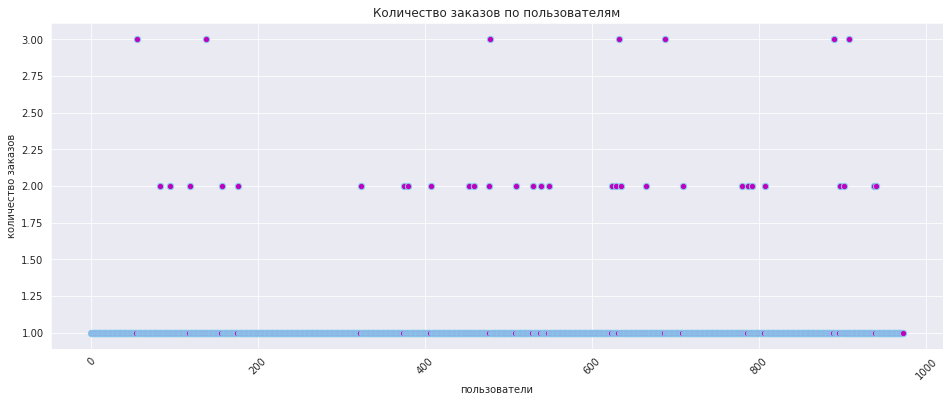

In [43]:
# График количества заказов
fig, ax = plt.subplots(figsize=(16, 6))
x_values = pd.Series(range(0,len(orders_per_user)))
sns.scatterplot(data=orders_per_user, x=x_values, y='orders', s=40, color='m', edgecolor="skyblue", linewidth=1)
plt.title('Количество заказов по пользователям')
plt.xlabel('пользователи')
plt.ylabel('количество заказов')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

**По графику видно что большинство пользователей делает не более 1 заказа, более 2 заказов - очень редкие случаи**

### 95-й и 99-й перцентили количества заказов на пользователя

In [44]:
# 95 и 99 персентили по заказам
print('Количество заказов у 95% пользователей',round(np.percentile(orders_per_user['orders'], 95)))
print('Количество заказов у 99% пользователей',round(np.percentile(orders_per_user['orders'], 99)))
# Установка границы аномалий по количеству заказов на покупателя по 95 персентилю
order_outliers_limit = round(np.percentile(orders_per_user['orders'], 95))

Количество заказов у 95% пользователей 1
Количество заказов у 99% пользователей 2


**95 % пользователей делают не больше 1 заказов, абсолютное большинство - 1, менее 1 % делают более 2 заказа, можно сказать что больше 1 заказа - аномалии**

### График стоимостей заказов

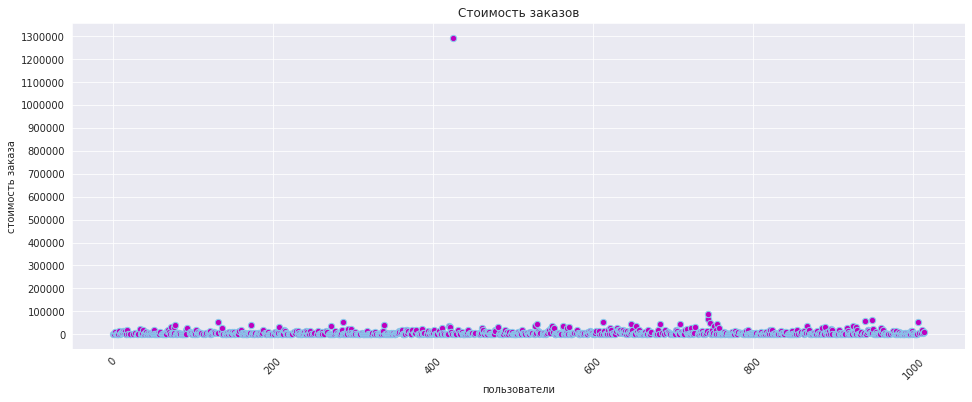

In [45]:
# График стоимости заказов
fig, ax = plt.subplots(figsize=(16, 6))
x_values = pd.Series(range(0,len(orders['revenue'])))
sns.scatterplot(data=orders, x=x_values, y='revenue', s=40, color='m', edgecolor="skyblue", linewidth=1)
plt.title('Стоимость заказов')
plt.xlabel('пользователи')
plt.ylabel('стоимость заказа')
ax.set_yticks(np.arange(0, 1400000, 100000))
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

**Стоимость заказов абсолютного большинства пользователей не превышает 50000, присутствуют аномально дорогие заказы в 100000 и 13000000**

### 95-й и 99-й перцентили стоимости заказов

In [46]:
# 95 и 99 персентили по заказам
print('Количество заказов у 95% пользователей',round(np.percentile(orders['revenue'], 95)))
print('Количество заказов у 99% пользователей',round(np.percentile(orders['revenue'], 99)))
# Установка границы аномалий по выручке на уровне 95 персентиля
revenue_outliers_limit = round(np.percentile(orders['revenue'], 95))

Количество заказов у 95% пользователей 26785
Количество заказов у 99% пользователей 53904


**Аномальные заказы - более 26785**

### Cтатистическая значимость различий в конверсии между группами по «сырым» данным

In [47]:
# Расчет количества заказов по пользователям групп А и B
orders_by_users_a = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})
orders_by_users_a.columns = ['visitorid', 'orders']
orders_by_users_b = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})
orders_by_users_b.columns = ['visitorid', 'orders']

In [48]:
# Объединение числа заказов определенного пользователя группы А с ничего не купившими (значение 0 в кол-ве заказов) группы А
sample_a = pd.concat(
    [orders_by_users_a['orders'],pd.Series(
        0, index=np.arange((
            visitors[visitors['group']=='A']['visitors'].sum()) - len(orders_by_users_a)), name='orders')],axis=0)

In [49]:
# Объединение числа заказов определенного пользователя группы B с ничего не купившими (значение 0 в кол-ве заказов) группы B
sample_b = pd.concat(
    [orders_by_users_b['orders'],pd.Series(
        0, index=np.arange((
            visitors[visitors['group']=='B']['visitors'].sum()) - len(orders_by_users_b)), name='orders')],axis=0)

Постановка гипотез:

<br>**$Ho$**  - конверсии по сырым между данным группами А и B не различаются.
<br>**$H1$**  - конверсии по сырым данным между группами А и B различаются

Уровень значимости = 0.05

In [50]:
# Проверка гипотез тестом Манна-Уитни
print('Относительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sample_b.mean() / sample_a.mean()-1))
alpha = 0.05
results = stats.mannwhitneyu(sample_a, sample_b, alternative = 'two-sided')
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Необходимо отвергуть нулевую гипотезу')
else:
    print('Не нужно отвергать нулевую гипотезу')

Относительный прирост конверсии группы B по отношению к группе A: 0.205
P-value: 0.0017678780799989383
Необходимо отвергуть нулевую гипотезу


**При уровне значимости в 5% разница тест на "сырых" показал статистическую значимость разницы между конверсиями. Если ужесточить уровень значимости до 1% то результат - пограничный. Необходимо проверить конверсии на данных очищенных от аномальных значений.**

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Постановка гипотез:


<br>**𝐻𝑜**  - средние чеки по сырым между данным между группами А и B не различаются.
<br>**𝐻1**  - средние чеки по сырым между данным между группами А и B различаются

Уровень значимости = 0.05

In [51]:
# Проверка гипотез тестом Манна-Уитни
print('Относительное изменение среднего чека в группе B по отношению группы A по сырым данным: {:.3f}'.format(
orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()-1))
results = stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Необходимо отвергуть нулевую гипотезу')
else:
    print('Не нужно отвергать нулевую гипотезу')

Относительное изменение среднего чека в группе B по отношению группы A по сырым данным: 0.287
P-value: 0.8294908998149533
Не нужно отвергать нулевую гипотезу


**Статистическая разница в средних чеках между группами А и B не подтвердилась, хотя отноистельно группы А средний чек группы B показал довольно большую разницу, различаясь более чем на четверть.**

### Cтатистическая значимость различий в конверсии между группами по «очищенным» данным

In [52]:
# Очистка данных от аномальных значений в соответствии со значениями 95 персентиля
users_with_many_orders = pd.concat([orders_by_users_a[orders_by_users_a['orders'] > order_outliers_limit]['visitorid'], 
                                orders_by_users_b[orders_by_users_b['orders'] > order_outliers_limit]['visitorid']], axis = 0)
users_with_expensive_orders = orders[orders['revenue'] > revenue_outliers_limit]['visitorid']

# Общее количество аномальных пользователей
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().sort_values()
print('Кол-во аномальных пользователей: {}'.format(len(abnormal_users)))

Кол-во аномальных пользователей: 86


In [53]:
# Фильтр группы А включая 0 продажи
sample_a_filtered = pd.concat([
    orders_by_users_a[np.logical_not(orders_by_users_a['visitorid'].isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum()-len(orders_by_users_a)), name='orders',)
], axis = 0)
# Фильтр группы B включая 0 продажи
sample_b_filtered = pd.concat([
    orders_by_users_b[np.logical_not(orders_by_users_b['visitorid'].isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum()-len(orders_by_users_b)),name='orders',)
], axis = 0)

Постановка гипотез:

<br>**$Ho$**  - конверсии по очищенным между данным группами А и B не различаются.
<br>**$H1$**  - конверсии по очищенным данным между группами А и B различаются

Уровень значимости = 0.05

In [54]:
# Расчет относительной конверсии
print('\nОтносительный прирост конверсии группы B по отношению к группе A после очистки данных: {:.3f}'.format(
    sample_b_filtered.mean() / sample_a_filtered.mean()-1))

# Тест Манна-Уитни
results = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered, alternative = 'two-sided')
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Необходимо отвергуть нулевую гипотезу')
else:
    print('Не нужно отвергать нулевую гипотезу')


Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.220
P-value: 0.0030252564574518516
Необходимо отвергуть нулевую гипотезу


**Тест на данных очищенных от аномальных занчений показал более уверенную статистическую разницу, даже если ужесточить уровень значимости до 1%, соответственно статистически конверсии двух групп различаются.**

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Постановка гипотез:


<br>**𝐻𝑜**  - средние чеки по очищенным между данным между группами А и B не различаются.
<br>**𝐻1**  - средние чеки по очищенным между данным между группами А и B различаются

Уровень значимости = 0.05

In [55]:
# Расчет относительного изменения среднего чека
print('Относительное изменение среднего чека в группе B по отношению группы A по очищенным данным: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'].mean()\
/ orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'].mean()-1))

Относительное изменение среднего чека в группе B по отношению группы A по очищенным данным: -0.034


In [56]:
# Тест Манна_Уитни
results = stats.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'],
alternative = 'two-sided')
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Необходимо отвергуть нулевую гипотезу')
else:
    print('Не нужно отвергать нулевую гипотезу')

P-value: 0.7271286894009963
Не нужно отвергать нулевую гипотезу


**Относительная разница между средними чеками двух групп по данным очищенных от аномалий сократилась с 28% до -3%, группа B утратила весь свой выигрыш, статистическую разницу не удалось подтвердить.**

In [57]:
# Итог по выручке групп
print('Выручка по группе А',orders.query('group == "A"')['revenue'].sum())
print('Выручка по группе B',orders.query('group == "B"')['revenue'].sum())
print('Прирост выручки группы B в %', round(
    ((orders.query('group == "B"')['revenue'].sum()*100) / orders.query('group == "A"')['revenue'].sum() - 100),2))

Выручка по группе А 3364656
Выручка по группе B 5068972
Прирост выручки группы B в % 50.65


## Общий вывод

**Кумулятивный средний чек группы B стабильно опережает группу A с 16 августа, кумулятивная конверсия группы B опережает группу А с 10 августа**

<br>**Относительные изменения кумулятивной конверсии и среднего чека показывают скачки и падения, но со второй половины месяца, показывают большую эффективность группы B.**

<br>**Статистическая значимость различия конверсий показывает более уверенную значимость на данных очищенных от аномалий, лимитированных значениями, не более 1 покупки и с суммой покупки не более 26785. Клиентов с покупками более 1 или суммой более 26785 не более 5%.**

<br>**Хотя по относительной разнице средних чеков группа B скорее ниже группы А и тест не позволил опровергнуть отсутствие разницы по этому показателю,  относительная конверсия группы B выше группы А на 22%, прирост выручки группы B - 50%  (5068972 против 3364656 соответственно). Можно сделать вывод что в результате теста группа B увеличила конверсию, что привело к увеличению выручки в половину, значит тест можно считать успешно завершенным победой группы B.**

**РЕКОМЕНДАЦИИ**

В результате проверки заказов оказалось что пять покупателей покупали одновременно в обоих группах А и B что могло привести к искажению результатов теста. Необходимо технически обеспечить исключение попадания одного и того же id покупателя в обе группы при проведении A/B тестов.
